In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [88]:
evaluation_data = pd.read_csv('./results/results_06_03_2024_11_59_12.csv')

# Results Analysis

In [89]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [105]:
print(len(evaluation_data))
evaluation_data.tail(10)

150


,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time(s),LastTokenQuery,EquivalenceQuery,Tree Depth,Inner Nodes,Accuracy_in_target,Accuracy_anywhere,TREE_SIZE
140,QuantNaryTreeLearner_Standard_Teacher,PDFA - d23cbca6133c4665b35ed37f394ec9db,6,6,1,3.388262,2523,2,1,1,1.0,1.0,7
141,QuantNaryTreeLearner_Standard_Teacher,PDFA - 08f784909e8c4ebeb9848c2024b14833,3,2,1,3.279848,2499,2,1,1,1.0,1.0,3
142,QuantNaryTreeLearner_Standard_Teacher,PDFA - 4c7bdf7078d344f9b63fb3c852645f6a,6,6,1,3.313824,2547,3,2,2,1.0,1.0,8
143,QuantNaryTreeLearner_Standard_Teacher,PDFA - 71970d27051149f5bb0e95eba83d3cb3,7,7,1,3.280394,2529,2,1,1,1.0,1.0,8
144,QuantNaryTreeLearner_Standard_Teacher,PDFA - 92fb080238dc43939d2df1b444edec5b,1,1,1,3.542877,2649,1,0,0,1.0,1.0,1
145,QuantNaryTreeLearner_Standard_Teacher,PDFA - 2ec45e2c6be44114a1918fbb20614210,6,6,1,3.399623,2523,2,1,1,1.0,1.0,7
146,QuantNaryTreeLearner_Standard_Teacher,PDFA - 6ba0aa6114194f42a2cf44254c8231a0,1,1,1,3.462050,2649,1,0,0,1.0,1.0,1
147,QuantNaryTreeLearner_Standard_Teacher,PDFA - ad667c1e6e804ca98e6499024cb4b418,5,5,1,3.246355,2535,3,2,2,1.0,1.0,7
148,QuantNaryTreeLearner_Standard_Teacher,PDFA - f33d757e29394600a07324f019d71135,1,1,1,3.417606,2649,1,0,0,1.0,1.0,1
149,QuantNaryTreeLearner_Standard_Teacher,PDFA - bce0b920376e466ea80c19a239c80c99,2,2,1,3.391031,2502,2,1,1,1.0,1.0,3


In [91]:
import math
#evaluation_data['OT_SIZE'] = evaluation_data['OT Prefixes']*evaluation_data['OT Suffixes']
evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']
#evaluation_data['STRUCTURE_SIZE'] = evaluation_data.apply(lambda row : row['TREE_SIZE'] if math.isnan(row['OT_SIZE']) else row['OT_SIZE'], axis = 1)

In [92]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res
cols_to_agg = ['Time(s)', 'LastTokenQuery', 'EquivalenceQuery', 'Extracted Number of States', 'Accuracy_in_target', 'Accuracy_anywhere', 'TREE_SIZE']
funcs =  ['median', IQR]  
names = ['median', 'IQR']  
grouped_multiple = evaluation_data.groupby(['Algorithm', 'Number of States']).agg({x:funcs for x in cols_to_agg})
col_names = [x+"_"+fun_name for x in cols_to_agg for fun_name in names]
grouped_multiple.columns = col_names
#grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
#'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR',]
grouped_multiple.reset_index(inplace = True)

In [93]:
grouped_multiple

,Algorithm,Number of States,Time(s)_median,Time(s)_IQR,LastTokenQuery_median,LastTokenQuery_IQR,EquivalenceQuery_median,EquivalenceQuery_IQR,Extracted Number of States_median,Extracted Number of States_IQR,Accuracy_in_target_median,Accuracy_in_target_IQR,Accuracy_anywhere_median,Accuracy_anywhere_IQR,TREE_SIZE_median,TREE_SIZE_IQR
0,QuantNaryTreeLearner_Omit_Zero_Transitions,1,0.052860,0.018689,90.0,33.0,1.0,0.0,2.0,0.0,1.000,0.0,1.000,0.4555,2.0,0.0
1,QuantNaryTreeLearner_Omit_Zero_Transitions,2,0.019713,0.000000,24.0,0.0,1.0,0.0,2.0,0.0,1.000,0.0,0.089,0.0000,2.0,0.0
2,QuantNaryTreeLearner_Omit_Zero_Transitions,3,0.085179,0.000000,39.0,0.0,2.0,0.0,3.0,0.0,1.000,0.0,0.089,0.0000,4.0,0.0
3,QuantNaryTreeLearner_Omit_Zero_Transitions,5,0.094946,0.000000,84.0,0.0,2.0,0.0,3.0,0.0,1.000,0.0,0.126,0.0000,4.0,0.0
4,QuantNaryTreeLearner_Omit_Zero_Transitions,6,0.108031,0.054470,135.0,37.5,2.0,0.5,5.0,1.5,1.000,0.0,0.239,0.2045,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,QuantNaryTreeLearner_Teacher_Filter,101,36.742123,0.000000,11091.0,0.0,20.0,0.0,74.0,0.0,0.999,0.0,0.393,0.0000,77.0,0.0
95,QuantNaryTreeLearner_Teacher_Filter,102,25.265887,0.000000,11979.0,0.0,17.0,0.0,77.0,0.0,1.000,0.0,0.207,0.0000,80.0,0.0
96,QuantNaryTreeLearner_Teacher_Filter,104,29.675786,0.000000,9948.0,0.0,24.0,0.0,89.0,0.0,1.000,0.0,0.363,0.0000,93.0,0.0
97,QuantNaryTreeLearner_Teacher_Filter,105,27.717711,0.000000,11817.0,0.0,19.0,0.0,80.0,0.0,1.000,0.0,0.254,0.0000,84.0,0.0


In [94]:
len(grouped_multiple)

99

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


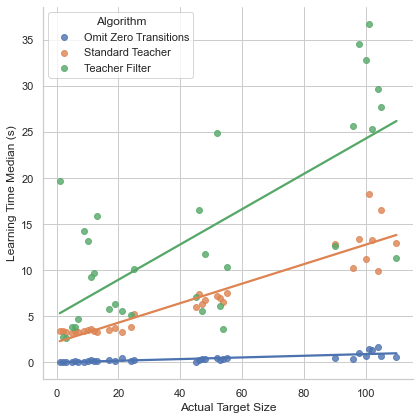

In [115]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Number of States", y="Time(s)_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, order = 1, ci=None, size = 6)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.axes[0,0].set_xlabel("Actual Target Size", fontsize = 12)
ax.axes[0,0].set_ylabel("Learning Time Median (s)", fontsize = 12)
new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)

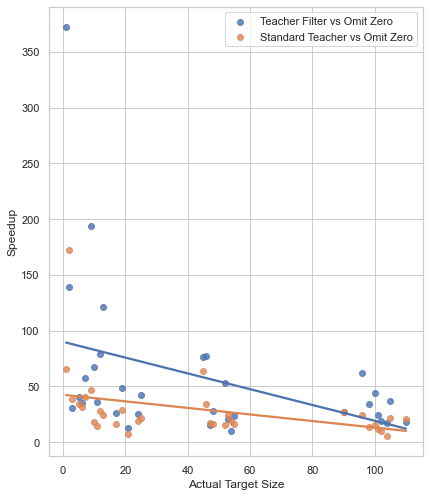

In [138]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
pivot = int(len(grouped_multiple)/3)

zero = np.array(grouped_multiple["Time(s)_median"][0:pivot])
standard = np.array(grouped_multiple["Time(s)_median"][pivot:2*pivot])
teacher_filter = np.array(grouped_multiple["Time(s)_median"][2*pivot:])

speedup_filter_vs_zero = teacher_filter/zero
speedup_standard_vs_zero = standard / zero

sns.set_style("whitegrid")
ax = sns.regplot(x=grouped_multiple['Number of States'][0:pivot], y=speedup_filter_vs_zero, order=1, ci=None, label="Teacher Filter vs Omit Zero")
ax = sns.regplot(x=grouped_multiple['Number of States'][0:pivot], y=speedup_standard_vs_zero, order=1, ci=None, label="Standard Teacher vs Omit Zero")
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Speedup", fontsize = 12)
ax.legend()

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


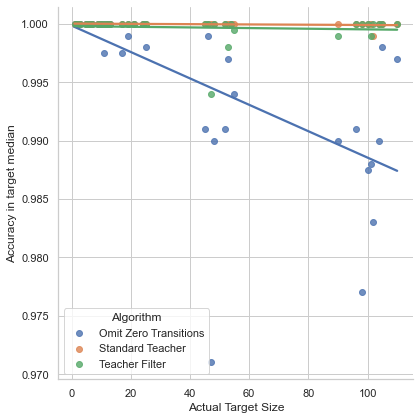

In [135]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Number of States", y="Accuracy_in_target_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, order = 1, ci=None, size = 6)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.axes[0,0].set_xlabel("Actual Target Size", fontsize = 12)
ax.axes[0,0].set_ylabel("Accuracy in target median", fontsize = 12)
new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)

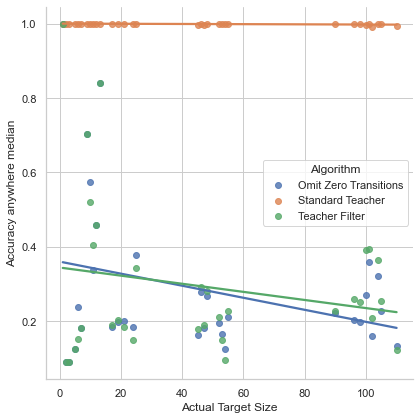

In [137]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Number of States", y="Accuracy_anywhere_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, order = 1, ci=None, size = 6)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.axes[0,0].set_xlabel("Actual Target Size", fontsize = 12)
ax.axes[0,0].set_ylabel("Accuracy anywhere median", fontsize = 12)
new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


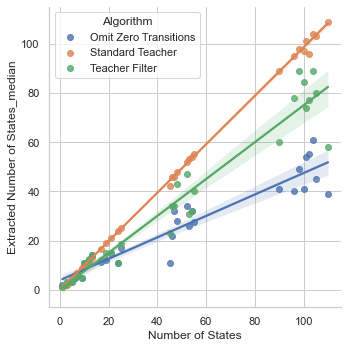

In [102]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Number of States", y="Extracted Number of States_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False)
new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


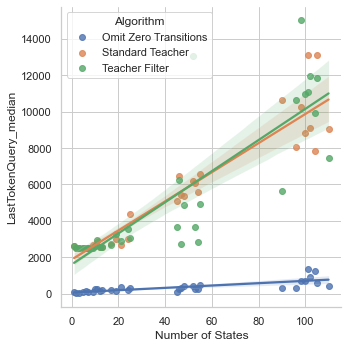

In [104]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Number of States", y="LastTokenQuery_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False)
new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


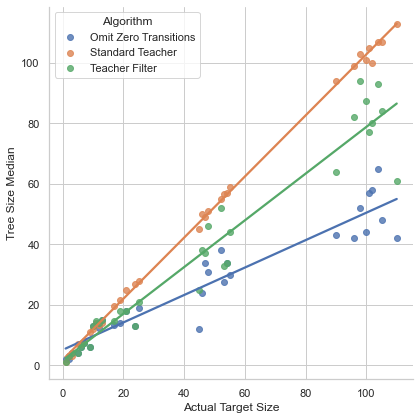

In [121]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Number of States", y="TREE_SIZE_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, ci = None, size = 6)
ax.axes[0,0].set_xlabel("Actual Target Size", fontsize = 12)
ax.axes[0,0].set_ylabel("Tree Size Median", fontsize = 12)
new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)

In [1]:
!pip install --upgrade pymodelextractor